# Observations and Insights

* Although the four most promising drugs (Capomulin, Ceftamin, Infubinol and Ramicane) were provided in the README file, it can be concluded from the summary statistics that these drugs have the most favorable numbers
* Out of those four durgs above the two - Capomulin and Ramicane are most effective due to the survival rate of the mouses treated with these drugs. This conclusion can be made based on the bar plots showing data points for each Drug Regimen. Capomulin and Ramicane have the two most data points meaning that the mouses been able to stay in the treatment for a longer time (did not die).
* Out of four Drug Regimens Ceftamin has the greatest interquartlie range which points to an unpredictive nature of the drug among four.
* Line plot of Tumor Volume Development over time of Mouses treated with Capomulin shows consistent results. The drug shows significant decrease in tumor volume.
* Mouse weight is linearly correlated with the tumor volume meaning the tumor volume increases as the mouse gains weight or maybe the opposite. 

## Dependencies and starter code

In [1]:
!cat "../README.md"

# Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

![Laboratory](Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor developme

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files

mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Check the data for null values and Nan values before merging two dataframes. There are duplicate mouses in the dataset but that is expected since the same 
# mouse can be used in different experiements.

print("Are there null values in study results?:", "\n", study_results.isnull().any())
print("Are there any NAN values in study results?:", "\n", study_results.isna().any())
print("Are there any null values in mouse metadata?:", "\n", mouse_metadata.isnull().any())
print("Are there any NAN values in mouse metadata?:", "\n", mouse_metadata.isna().any())


# Combine the data into a single dataset. Here it was chose outer type to merge the two dataframes as it will return the
# complete data from both tables

complete_study = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')
complete_study.head()

# Additional info: Right off the bat by looking at the first 20 rows of the complete data it can be concluded that the Mouse
# ID f932 did not survive the test. It could be due to the age of the mouse, given the average lifespan of 18 months.


Are there null values in study results?: 
 Mouse ID              False
Timepoint             False
Tumor Volume (mm3)    False
Metastatic Sites      False
dtype: bool
Are there any NAN values in study results?: 
 Mouse ID              False
Timepoint             False
Tumor Volume (mm3)    False
Metastatic Sites      False
dtype: bool
Are there any null values in mouse metadata?: 
 Mouse ID        False
Drug Regimen    False
Sex             False
Age_months      False
Weight (g)      False
dtype: bool
Are there any NAN values in mouse metadata?: 
 Mouse ID        False
Drug Regimen    False
Sex             False
Age_months      False
Weight (g)      False
dtype: bool


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


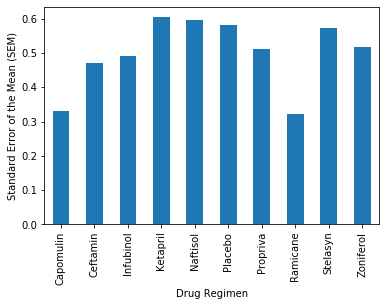

In [3]:
%matplotlib inline
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = complete_study[["Drug Regimen", "Tumor Volume (mm3)"]].groupby('Drug Regimen')

tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_variance = drug_group['Tumor Volume (mm3)'].var()
tumor_std = drug_group['Tumor Volume (mm3)'].std()
tumor_sem = drug_group['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance, "STD": tumor_std, \
                                  "SEM": tumor_sem})

# The following plot is to show the most effective drugs according to their SEM values. Although all 5 statistical parameters
# should be take into account when deciding the effectiveness of the drugs. The plots of other statistical parameters are
# identical to below represented SEM results
ax_sem = summary_statistics['SEM'].plot.bar()
ax_sem.set_ylabel('Standard Error of the Mean (SEM)')
summary_statistics

From above analysis it can be concluded that the 4 most promising drugs to battle the type of cancer are 

* Ramicane,
* Capomulin,
* Ceftamin and,
* Infubinol. 

The statistics of these drugs show minimum mean and standard error of the mean.

## Bar plots

Text(0, 0.5, 'Number of data points')

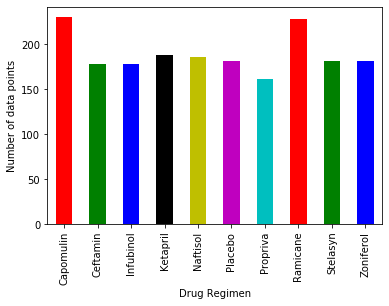

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_points = drug_group.count()
ax = data_points.plot.bar(legend=False, color='rgbkymc')
ax.set_ylabel('Number of data points')

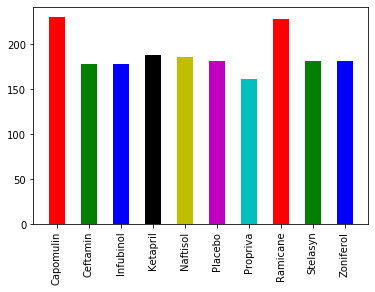

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(data_points.index, data_points['Tumor Volume (mm3)'], width = 0.5, color = 'rgbkymc')
plt.xticks(data_points.index, rotation='vertical')
plt.show()

## Pie plots

Text(0.5, 1.0, 'Distribution of Female vs Male')

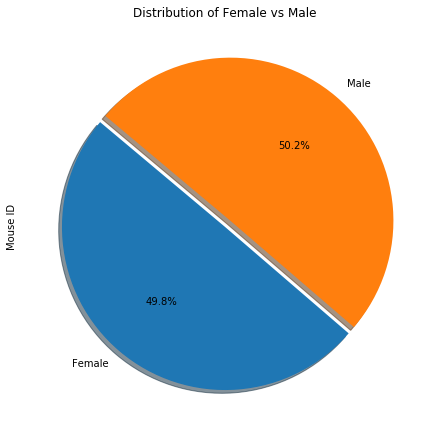

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

explode = [0,0.05]
gender_group = complete_study.groupby("Sex")
ax1 = gender_group['Mouse ID'].nunique().plot(kind = 'pie', figsize=(7.5, 7.5), explode=explode, autopct='%1.1f%%',\
                                        shadow=True, startangle=140)

ax1.set_title("Distribution of Female vs Male")

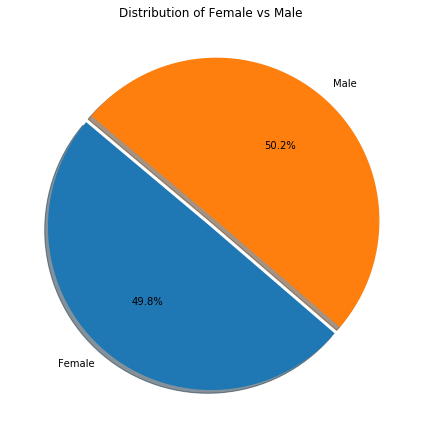

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_group = complete_study.groupby("Sex")

fig1, ax2 = plt.subplots(figsize=(7.5, 7.5))

explode = [0,0.05]


ax2.pie(gender_group['Mouse ID'].nunique(), explode = explode, labels= gender_group['Mouse ID'].nunique().index,\
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title("Distribution of Female vs Male")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# In order to create drug masks it is important to convert elements in Drug Regimen Column into str. In original dataframe they are objects.

complete_study["Drug Regimen"] = complete_study["Drug Regimen"].astype(str)

# We put the most effective 4 drugs into a list. 

effective_drugs = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

# create masks for each most effective drug regimens

ramicane_mask = complete_study['Drug Regimen'] == 'Ramicane'
capomulin_mask = complete_study['Drug Regimen'] == 'Capomulin'
ceftamin_mask = complete_study['Drug Regimen'] == 'Ceftamin'
infubinol_mask = complete_study['Drug Regimen'] == 'Infubinol'

# apply the mask to the original dataframe

drug_mask = complete_study[ramicane_mask | capomulin_mask | ceftamin_mask | infubinol_mask]

# retreive final tumor volume for each mouse

final_tumor_volume = drug_mask.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last().reset_index()
final_tumor_volume = final_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})

# Loop over all four Drug Regimens and calculate statistical information about each one of them according to the tumor volumes
data = []
outlier_mouse = []
for drug in final_tumor_volume['Drug Regimen'].unique():
    
    # IQR calculation
    data.append(final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Final Tumor Volume (mm3)'])
    q1 = np.percentile(final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Final Tumor Volume (mm3)'].values, 25)
    q2 = np.percentile(final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Final Tumor Volume (mm3)'].values, 50)
    q3 = np.percentile(final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Final Tumor Volume (mm3)'].values, 75)
    iqr = q3 - q1

    upper_boundary = q3 + 1.5*iqr
    lower_boundary = q1 - 1.5*iqr
    
    # Determine if there are outliers
    outlier_prep = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug][['Mouse ID', 'Final Tumor Volume (mm3)']]
    outlier1 = (outlier_prep['Final Tumor Volume (mm3)'] > upper_boundary).any()
    outlier2 = (outlier_prep['Final Tumor Volume (mm3)'] < lower_boundary).any()
    
    # Quantitative check for outliers in the dataset

    if outlier1:
        print(f'There are outlier(s) in {drug} treated tummor volumes\n')
        print(f"The outlier Mouse ID: {outlier_prep[outlier_prep['Final Tumor Volume (mm3)'] > upper_boundary]['Mouse ID'].values}")
        print(f"\nQ1_{drug} = ", q1, f'\nMedian_{drug} = ', q2, f'\nQ3_{drug} = ', q3)
        print(f"IQR_{drug} = ", iqr, f'\nUpper Boundary_{drug} = ', upper_boundary, f'\nLower Boundary_{drug} = ', lower_boundary, "\n\n")
    elif outlier2:
        print(f'There are outlier(s) in {drug} treated tummor volumes\n')
        print(f"The outlier Mouse ID: {outlier_prep[outlier_prep['Final Tumor Volume (mm3)'] < lower_boundary]['Mouse ID'].values}")
        print(f"\nQ1_{drug} = ", q1, f'\nMedian_{drug} = ', q2, f'\nQ3_{drug} = ', q3)
        print(f"IQR_{drug} = ", iqr, f'\nUpper Boundary_{drug} = ', upper_boundary, f'\nLower Boundary_{drug} = ', lower_boundary, "\n\n")
    else:
        print(f'There are no outliers in {drug} treated tumor volumes\n')
        print(f"Q1_{drug} = ", q1, f'\nMedian_{drug} = ', q2, f'\nQ3_{drug} = ', q3)
        print(f"IQR_{drug} = ", iqr, f'\nUpper Boundary_{drug} = ', upper_boundary, f'\nLower Boundary_{drug} = ', lower_boundary, "\n\n")

    
final_tumor_volume

There are outlier(s) in Infubinol treated tummor volumes

The outlier Mouse ID: ['c326']

Q1_Infubinol =  54.04860769 
Median_Infubinol =  60.16518046 
Q3_Infubinol =  65.52574285
IQR_Infubinol =  11.477135160000003 
Upper Boundary_Infubinol =  82.74144559000001 
Lower Boundary_Infubinol =  36.83290494999999 


There are no outliers in Ceftamin treated tumor volumes

Q1_Ceftamin =  48.72207785 
Median_Ceftamin =  59.85195552 
Q3_Ceftamin =  64.29983003
IQR_Ceftamin =  15.577752179999997 
Upper Boundary_Ceftamin =  87.66645829999999 
Lower Boundary_Ceftamin =  25.355449580000002 


There are no outliers in Ramicane treated tumor volumes

Q1_Ramicane =  31.56046955 
Median_Ramicane =  36.56165229 
Q3_Ramicane =  40.65900627
IQR_Ramicane =  9.098536719999998 
Upper Boundary_Ramicane =  54.30681135 
Lower Boundary_Ramicane =  17.912664470000003 


There are no outliers in Capomulin treated tumor volumes

Q1_Capomulin =  32.37735684 
Median_Capomulin =  38.125164399999996 
Q3_Capomulin =  4

,Mouse ID,Drug Regimen,Final Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


## Let's look at our outlier

In [9]:
complete_study[complete_study['Mouse ID'] == "c326"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
213,c326,0,45.000000,0,Infubinol,Female,18,25
214,c326,5,36.321346,0,Infubinol,Female,18,25


### It turns out the outlier is an old mouse who did not survive the tests because of its age. Because the treatment last only 5 days out of 45 days complete treatment cycle it is impossible to predict the future reaction of the tumor to this medicine.

# Let's visualize the Tumor volume statistics for each drug regimen below.

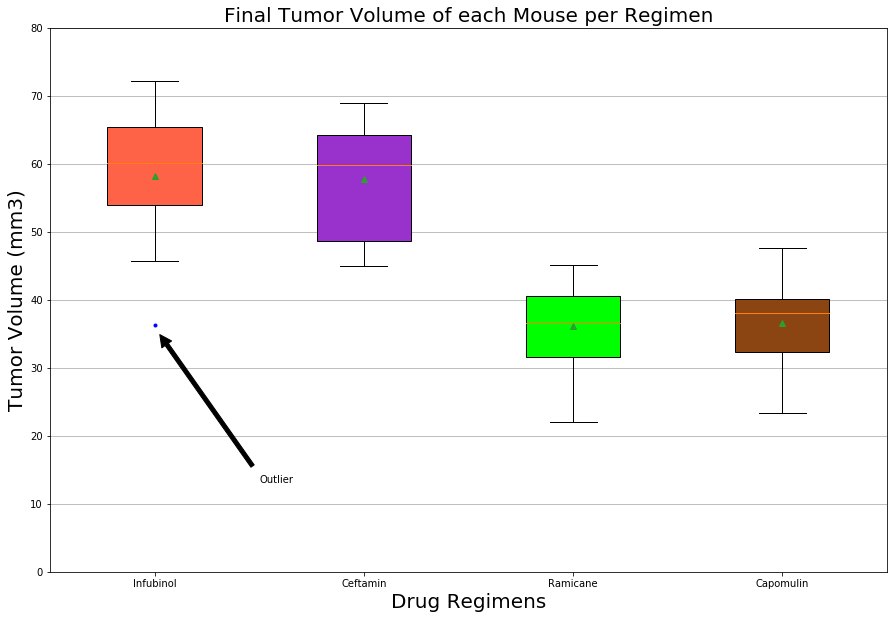

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig, axes = plt.subplots(figsize = (15, 10))
axes.annotate('Outlier', xy=(1, 36), xytext=(1.5, 13),\
            arrowprops=dict(facecolor='black', shrink=0.05),)
bplot = axes.boxplot(data, vert=True, patch_artist=True, showmeans=True, sym='b.')

# Create customize colors for boxplots
colors = ['tomato', 'darkorchid', 'lime', 'saddlebrown']



# Apply colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
axes.yaxis.grid(True)
axes.set_title('Final Tumor Volume of each Mouse per Regimen', fontsize=20)
axes.set_ylim(0,80)
axes.set_xlabel('Drug Regimens',fontsize=20)
axes.set_ylabel('Tumor Volume (mm3)',fontsize=20)

# Place xticks
plt.setp(axes, xticklabels=list(final_tumor_volume['Drug Regimen'].unique()))
plt.xticks(horizontalalignment='center')

plt.show()


The behavior of the above boxplot was a little confusing at first, especially for the Tumor Volume treated by Infubinol. The lower limit of the whisker in boxplot was way off from the calculated value of 36 mm3 (Approximately 45 mm3 in boxplot). I went ahead and analyzed the smallest 5 values in my final_tumor_volume dataframe.

 

In [11]:
final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Infubinol'].nsmallest(5, 'Final Tumor Volume (mm3)')

,Mouse ID,Drug Regimen,Final Tumor Volume (mm3)
15,c326,Infubinol,36.321346
58,o813,Infubinol,45.699331
79,v339,Infubinol,46.250112
52,m756,Infubinol,47.010364
85,w193,Infubinol,50.005138


According to above calculations Lower Boundary_Infubinol =  36.83290494999999
This is is slightly greater than minimum tumor volume in the tumor volume array, therefore the boxplot function picks up the next smallest element, which is (58 - o813 - Infubinol - 45.699331) and shortens its lower boundary to that point. 

## Line and scatter plots

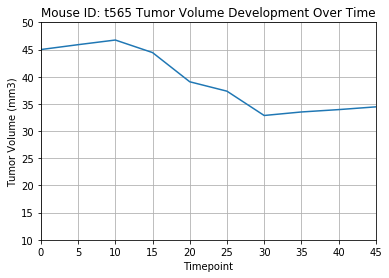

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Because the task is to generate a line plot of a time point vs tumor volume for a single mouse it was decided to
# pick a random mouse that is treated with Capomulin

capomulin_df = complete_study[capomulin_mask]
capomulin_df = capomulin_df.set_index('Timepoint')

#pick a random mouse
random_mouse_id = capomulin_df['Mouse ID'].sample().values[0]

#apply mask to the capomulin_df and plot it
plt.plot(capomulin_df[capomulin_df['Mouse ID'] == random_mouse_id]['Tumor Volume (mm3)'])
plt.title(f"Mouse ID: {random_mouse_id} Tumor Volume Development Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Set the ylimit and xlimit for trustworthy representation of relation between tumor volume and the time. y andx 
#limits are chosen based on the minimum and maximum tumor volumes and total timepoints in the given dataset of mouses treated by Capomulin
plt.ylim(10, 50)
plt.xlim(0,45, 5)
plt.grid()
plt.show()

(10, 50)

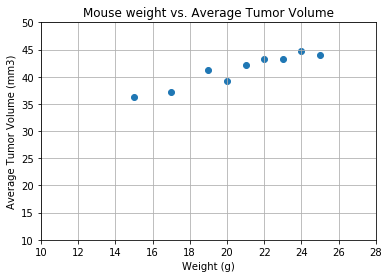

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = complete_study[capomulin_mask]
capo_weight_group = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()
capo_weight_group = capo_weight_group.rename(columns = {'Tumor Volume (mm3)': "Average Tumor Volume (mm3)"})
weight = capo_weight_group['Weight (g)'].values
tum_vol = capo_weight_group['Average Tumor Volume (mm3)'].values

plt.scatter(weight, tum_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs. Average Tumor Volume')
plt.grid()

# For the sake of adequate visualization the x lim and y lim are chosen. Since weight never can be 0 it was decided to start
# from 10, similarly, there is no tumor volume smaller than 20 mm3 in the complete dataset and tumor cannot be 0 it was decided
#to have the same start limit for y axis as for x. 
plt.xlim(10,28)
plt.ylim(10,50)

Correlation between the Weight and Average Tumor Volume

                             Weight (g)  Average Tumor Volume (mm3)
Weight (g)                    1.000000                    0.950524
Average Tumor Volume (mm3)    0.950524                    1.000000 




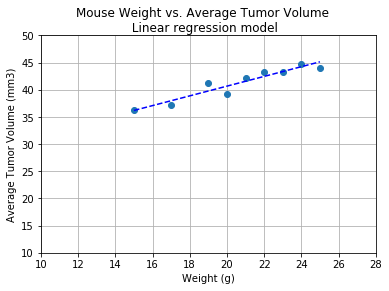

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Correlation coefficient

print("Correlation between the Weight and Average Tumor Volume\n\n", capo_weight_group.corr(), "\n\n")

# Linear regression model

from scipy.stats import linregress
(slope, intercept, _, _, _) = linregress(weight, tum_vol)

fit = slope * capo_weight_group['Weight (g)'].values + intercept

fig, ax = plt.subplots()
fig.suptitle("Mouse Weight vs. Average Tumor Volume\n Linear regression model")

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.plot(weight, tum_vol, linewidth=0, marker='o')
ax.plot(weight, fit, 'b--')
plt.grid()
plt.xlim(10,28)
plt.ylim(10,50)
plt.show()